In [1]:
# de uint8 a float--> img_as_float(img_in) Convert an image to floating point format, with values in [0, 1]. I
# de float a uint8 --> img_as_ubyte # Convert an image to unsigned byte format, with values in [0, 255].

In [1]:
from ipynb.fs.full.toolbox import *

In [2]:
in_dir = "./data"
im_name = "/sky_gray.jpg"
im = io.imread(in_dir + im_name)
im_gray = rgb2gray(im)
im_gray = img_as_ubyte(im_gray) #para tenerla en uint8

El tipo de la imagen es:  uint8
el max del hist es : <built-in method max of numpy.ndarray object at 0x0000022A30A31F50>
el min del hist es : <built-in method min of numpy.ndarray object at 0x0000022A30A31F50>


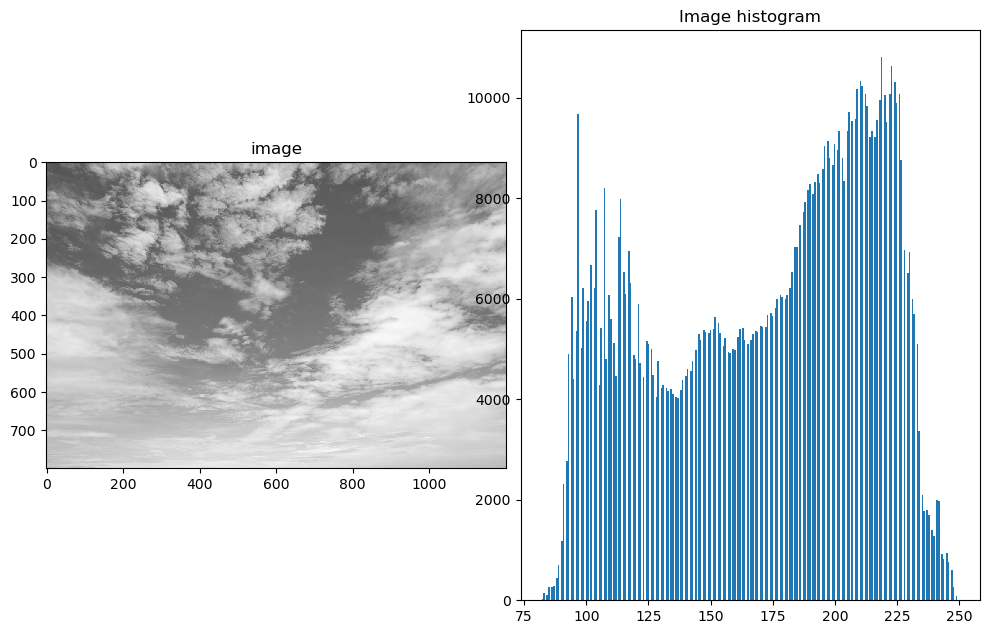

In [3]:
img_and_hist(im_gray)

In [8]:
def histogram_stretch(img_in):
    # ojo aqui al formato de las imagenes de entrada
    # si me dan el max o min desired en px tengo que tener la imagen en uint8
    # si me dan el max o min desired en float tengo que tener la img en float
    # quitar o poner el 255 de abajo si necesario      
    """
    Stretches the histogram of an image 
    :param img_in: Input image
    :return: Image, where the histogram is stretched so the min values is 0 and the maximum value 255
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
        
    
    min_desired = 10/255
    max_desired = 200/255
	
    img_out = ( (max_desired-min_desired) / (max_val-min_val)) * ((img_float-min_val) + min_desired)
    
    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    plt.figure()
    
    plt.subplot(221)
    plt.hist(img_float.ravel())
    plt.title("Histogram before stretching")
    
    plt.subplot(222)
    io.imshow(img_float)
    plt.title("Image before stretching")
    
    plt.subplot(223)
    plt.hist(img_out.ravel())
    plt.title("Histogram after stretching")
    
    plt.subplot(224)
    io.imshow(img_out)
    plt.title("Image after stretching")
    
    plt.show()
    print(f"Max before stretching: {img_float.max():.2f}")
    print(f"Min before stretching: {img_float.min():.2f}\n")
    
    print("Max after stretching:",img_out.max())
    print("Min after stretching:",img_out.min())
    print()
    print(f"Average pixel value after stretching: {img_out.mean():.3f}\n" )
    return img_as_ubyte(img_out)

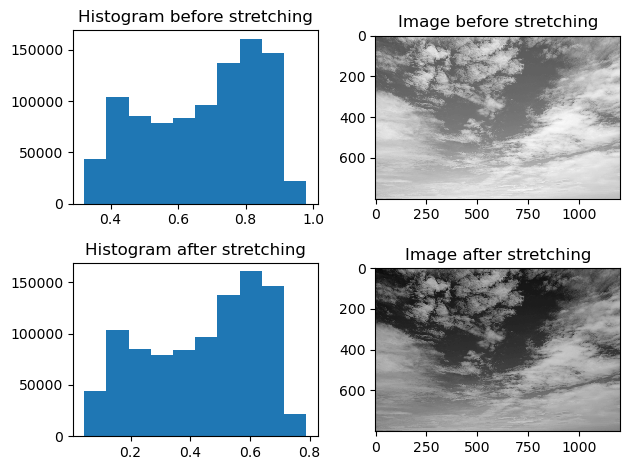

Max before stretching: 0.98
Min before stretching: 0.32

Max after stretching: 0.7894491129785247
Min after stretching: 0.044351073762838464

Average pixel value after stretching: 0.443



In [9]:
img_out = histogram_stretch(im_gray)
# si quieres sabe el valor de u px en una imagen solo haz:
img_out[19,19]

El tipo de la imagen es:  uint8


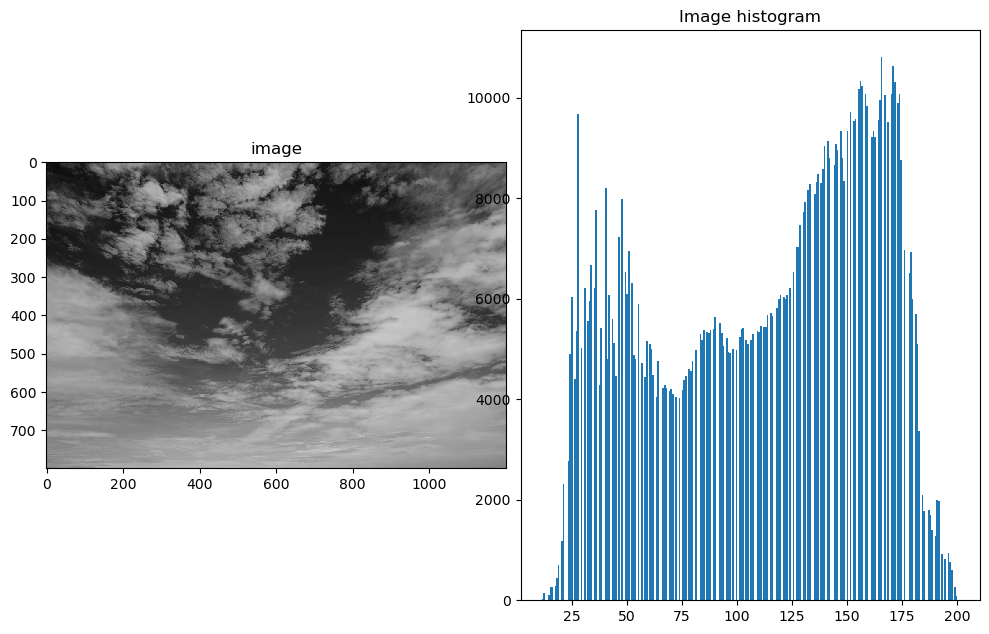

In [10]:
im_uint8 = img_as_ubyte(img_out) #para tenerla en uint8
img_and_hist(im_uint8)